## TensorBoard使用

**使用流程：**

    python1脚本中记录所需数据-->生成event file文件-->tensorboard终端

In [3]:
import matplotlib.pyplot as plt

### 1. Python终端代码，生成event文件

In [1]:
'''
TensorBoard测试代码
'''

import numpy as np
from torch.utils.tensorboard import SummaryWriter

##引入SummaryWriter类
writer = SummaryWriter(comment='test_tensorboard')

for x in range(100):
    
    ##添加绘图数据，生成event file文件
    writer.add_scalar('y=2x', x * 2, x) # 曲线名称，y轴，x轴
    writer.add_scalar('y=pow(2, x)',  2 ** x, x)
    
    writer.add_scalars('data/scalar_group', {"xsinx": x * np.sin(x),  # 添加event file文件路径
                                             "xcosx": x * np.cos(x),
                                             "arctanx": np.arctan(x)}, x)
writer.close()

### 2. tensorboard终端查看

**终端命令**

- 输入runs文件夹路径
  
        tensorboard --logdir=E:/.../runs

### **SummaryWriter类基本属性**

    SummaryWriter(log_dir=log_dir, comment='_scalars', filename_suffix="12345678")
    
- 功能

    提供创建event file的高级接口
    
- log_dir

    event file输出文件夹
    
- comment

    不指定log_dir时，文件夹后缀

- filename_fuffix

    event file文件名

    

In [2]:
import matplotlib.pyplot as plt

In [3]:
# ----------------------------------- 0 SummaryWriter -----------------------------------
##一般优先采用有路径模式
log_dir = "./train_log/test_log_dir"
#指定路径生成event file文件 comment='_scalars'不起作用
writer = SummaryWriter(log_dir=log_dir, comment='_scalars', filename_suffix="12345678")
#writer = SummaryWriter(comment='_scalars', filename_suffix="12345678")

for x in range(100):
    writer.add_scalar('y=pow_2_x', 2**x, x)

writer.close()

In [6]:
# ----------------------------------- 0 SummaryWriter -----------------------------------
#直接在默认文件夹下生成runs文件
writer = SummaryWriter(comment='_scalars', filename_suffix="12345678")

for x in range(100):
    writer.add_scalar('y=pow_2_x', 2**x, x)

writer.close()

### **SummaryWriter类基本方法**

- add_scalar(tag, scalar_value, global_step)
 
    - 功能
        
        记录标量，只能绘制单条曲线
    
    - tag
    
        图像的标签名，图的唯一标识
        
    - scalar_value
    
        要记录的标量
        
    - global_step
    
        x轴
        
- add_scalars(main_tag,tag_scalar_dict)

    - 功能
    
        可以绘制多条曲线
        
    - main_tag
    
        该图的标签
        
    - tag_scalar_dict
    
        传入字典类 key是变量的tag，value是变量的值

In [8]:
# ----------------------------------- 1 scalar and scalars -----------------------------------
max_epoch = 100

writer = SummaryWriter(comment='test_comment', filename_suffix="test_suffix")

for x in range(max_epoch):
    
    # 单条曲线绘制
    writer.add_scalar('y=2x', x * 2, x)
    writer.add_scalar('y=pow_2_x', 2**x, x)
    
    # 通过字典传入，多条曲线绘制
    writer.add_scalars('data/scalar_group', {
        "xsinx": x * np.sin(x),
        "xcosx": x * np.cos(x)
    }, x)
writer.close()

- add_histogram(tag, values, global_step, bins)

    - 功能
    
        统计直方图与多分位数折线图
        
    - tag
    
        图像的标签名，图的唯一标识
        
    - values
    
        要统计的参数，权值或者梯度或者偏置
        
    - global_step
    
        y轴
        
    - bins
    
        取直方图的bins

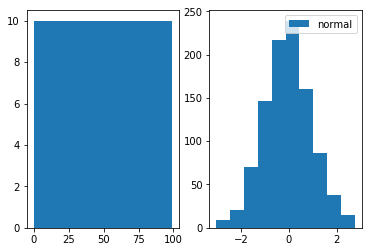

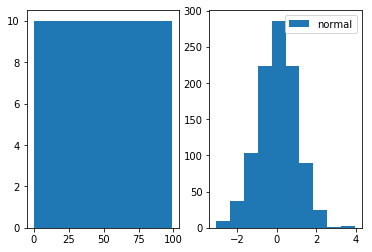

In [4]:
# ----------------------------------- 2 histogram -----------------------------------
writer = SummaryWriter(comment='test_comment', filename_suffix="test_suffix")

for x in range(2):

    np.random.seed(x)

    data_union = np.arange(100)
    data_normal = np.random.normal(size=1000)

    writer.add_histogram('distribution union', data_union, x) # data_union 
    writer.add_histogram('distribution normal', data_normal, x)

    plt.subplot(121).hist(data_union, label="union")
    plt.subplot(122).hist(data_normal, label="normal")
    plt.legend()
    plt.show()

writer.close()

In [6]:
data_union

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## 基于TensorBoard对网络模型的性能指标的监控例程

代码实例：

    # 参数设置
    # ============================ step 1/5 数据 ============================
    # ============================ step 2/5 模型 ============================
    # ============================ step 3/5 损失函数 ============================
    # ============================ step 4/5 优化器 ============================
    # ============================ step 5/5 训练 ============================
    
    ##基于matplot绘制曲线
    train_curve = list()
    valid_curve = list()

    iter_count = 0

    # 构建 SummaryWriter，监控数据====================================================================
    writer = SummaryWriter(comment='test_your_comment', filename_suffix="_test_your_filename_suffix")

    for epoch in range(MAX_EPOCH):

        loss_mean = 0.
        correct = 0.
        total = 0.

        net.train()
        for i, data in enumerate(train_loader):

            iter_count += 1

            # forward

            # backward================================================
            loss = criterion(outputs, labels)

            # update weights

            # 统计分类情况
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            #统计正确率================================================
            correct += (predicted == labels).squeeze().sum().numpy()

            # 打印训练信息
            loss_mean += loss.item()
            train_curve.append(loss.item())
            if (i+1) % log_interval == 0:
                loss_mean = loss_mean / log_interval
                print("Training:Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                    epoch, MAX_EPOCH, i+1, len(train_loader), loss_mean, correct / total))
                loss_mean = 0.

            # 记录数据，保存于event file=========================================
            writer.add_scalars("Loss", {"Train": loss.item()}, iter_count)
            writer.add_scalars("Accuracy", {"Train": correct / total}, iter_count)

        # 每个epoch，记录梯度，权值================================================
        for name, param in net.named_parameters():
            writer.add_histogram(name + '_grad', param.grad, epoch)
            writer.add_histogram(name + '_data', param, epoch)

        
        # validate the model
        if (epoch+1) % val_interval == 0:

            correct_val = 0.
            total_val = 0.
            loss_val = 0.
            net.eval()
            with torch.no_grad():
                for j, data in enumerate(valid_loader):
                    inputs, labels = data
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)

                    _, predicted = torch.max(outputs.data, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).squeeze().sum().numpy()

                    loss_val += loss.item()

                valid_curve.append(loss.item())
                print("Valid:\t Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                    epoch, MAX_EPOCH, j+1, len(valid_loader), loss_val, correct / total))

                # 记录数据，保存于event file========================================================================
                writer.add_scalars("Loss", {"Valid": np.mean(valid_curve)}, iter_count)
                writer.add_scalars("Accuracy", {"Valid": correct / total}, iter_count)

    train_x = range(len(train_curve))
    train_y = train_curve

    train_iters = len(train_loader)
    valid_x = np.arange(1, len(valid_curve)+1) * train_iters*val_interval # 由于valid中记录的是epochloss，需要对记录点进行转换到iterations
    valid_y = valid_curve

    plt.plot(train_x, train_y, label='Train')
    plt.plot(valid_x, valid_y, label='Valid')

    plt.legend(loc='upper right')
    plt.ylabel('loss value')
    plt.xlabel('Iteration')
    plt.show()